In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from scipy.stats import pearsonr

In [58]:

# Dataset path
file_path = "../data/AmesHousing.csv"

# Load file
data = pd.read_csv(file_path)

# Choosing target
target = data.SalePrice
print(data.columns)
print(data.shape)



Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      


Top 10 Features Numéricas com Maior Correlação com SalePrice:
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647861
Garage Area       0.640385
Total Bsmt SF     0.632105
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.510684
Name: SalePrice, dtype: float64


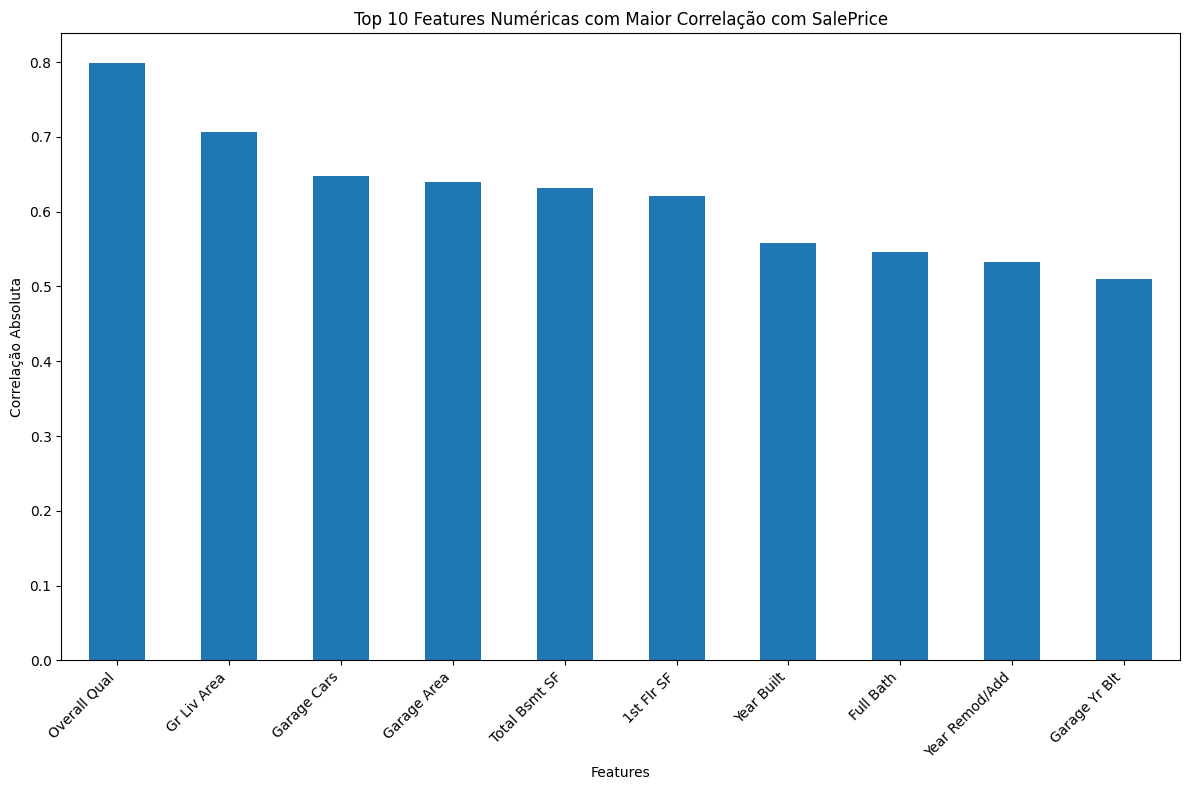


Features Selecionadas:
['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Exter Qual_Ex', 'Exter Qual_TA', 'Foundation_PConc', 'Bsmt Qual_Ex', 'BsmtFin Type 1_GLQ', 'Kitchen Qual_Ex', 'Kitchen Qual_TA']


In [65]:
# Identifica features categóricas
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Identifica features numéricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'SalePrice' das listas de features
if 'SalePrice' in numeric_features:
    numeric_features.remove('SalePrice')

# Prepara os dados numéricos
X_numeric = data[numeric_features]

# Tratamento de valores ausentes para features numéricas
numeric_imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X_numeric), columns=X_numeric.columns)

# Codificação one-hot para features categóricas
X_categorical_encoded = pd.get_dummies(data[categorical_features])

# Combina features numéricas e categóricas
X = pd.concat([X_numeric_imputed, X_categorical_encoded], axis=1)
y = data['SalePrice']

# Calcula a correlação com SalePrice (para features numéricas)
correlation_with_price = X_numeric_imputed.join(y).corr()['SalePrice'].abs()
correlation_sorted = correlation_with_price.sort_values(ascending=False)

print("\nTop 10 Features Numéricas com Maior Correlação com SalePrice:")
print(correlation_sorted[1:11])  # Exclui a correlação do SalePrice consigo mesmo

# Visualização das correlações numéricas
plt.figure(figsize=(12,8))
correlation_sorted[1:11].plot(kind='bar')
plt.title('Top 10 Features Numéricas com Maior Correlação com SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlação Absoluta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Padroniza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método de Seleção de Features usando F-regression
selector = SelectKBest(score_func=f_regression, k=20)  # Aumentei para 20 devido às features categóricas
X_selected = selector.fit_transform(X_scaled, y)

# Obtém os nomes das features selecionadas
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask]

print("\nFeatures Selecionadas:")
print(selected_features.tolist())



In [77]:

# Creating features 
# First way to compare features
features_set_1 = ['Lot Area','Year Built', 'Neighborhood' , 'House Style']
X1 = pd.get_dummies(data[features_set_1])

features_set_2 = ['Lot Area','Year Built','Garage Area', 'Overall Qual' , 'Overall Cond']
X2 = pd.get_dummies(data[features_set_2])

X3 = X_selected # Get the selected "Best features"
# Validating each set
for features, X in zip(['Set 1', 'Set 2','Set 3'], [X1, X2, X3]):
    train_X, val_X, train_y, val_y = train_test_split(X, target, random_state=1)
    rf_model = RandomForestRegressor(random_state=1)
    rf_model.fit(train_X, train_y)
    predictions = rf_model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    print(f"Validation MAE for {features}: {mae:,.0f}")
    

Validation MAE for Set 1: 24,735
Validation MAE for Set 2: 22,430
Validation MAE for Set 3: 16,611


In [ ]:
# Fazer acuracia ou precisão